In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#get the citibike trip data
path_one = './data/citibike.csv'
path_two = './data/citibike2.csv'

In [12]:
df1 = pd.read_csv(path_one)
df2 = pd.read_csv(path_two)

In [13]:
#add two 
df = pd.concat([df1,df2])

In [14]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,316,2019-06-01 00:05:55.7210,2019-06-01 00:11:11.9940,3187,Warren St,40.721124,-74.038051,3199,Newport Pkwy,40.728745,-74.032108,29677,Subscriber,1993,1
1,280,2019-06-01 00:08:09.0920,2019-06-01 00:12:50.0730,3185,City Hall,40.717733,-74.043845,3267,Morris Canal,40.712419,-74.038526,29571,Subscriber,1984,1
2,2162,2019-06-01 00:13:11.8800,2019-06-01 00:49:14.3640,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,26208,Customer,1969,0
3,2184,2019-06-01 00:13:30.1110,2019-06-01 00:49:54.2250,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,29487,Customer,1969,0
4,139,2019-06-01 00:13:31.8520,2019-06-01 00:15:51.7880,3207,Oakland Ave,40.737604,-74.052478,3207,Oakland Ave,40.737604,-74.052478,29592,Subscriber,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43741,673,2019-07-31 23:39:13.1800,2019-07-31 23:50:26.6520,3681,Grand St,40.715178,-74.037683,3277,Communipaw & Berry Lane,40.714358,-74.066611,26284,Subscriber,1987,1
43742,161,2019-07-31 23:41:24.1110,2019-07-31 23:44:05.4090,3211,Newark Ave,40.721525,-74.046305,3203,Hamilton Park,40.727596,-74.044247,29570,Subscriber,1998,1
43743,310,2019-07-31 23:47:27.3940,2019-07-31 23:52:37.4870,3195,Sip Ave,40.730897,-74.063913,3678,Fairmount Ave,40.725726,-74.071959,26237,Subscriber,1977,1
43744,137,2019-07-31 23:59:29.9300,2019-08-01 00:01:47.1970,3199,Newport Pkwy,40.728745,-74.032108,3638,Washington St,40.724294,-74.035483,29121,Subscriber,1993,1


In [15]:
#check out the columns in the dataframe
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

#### Explanation of the data types

- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

#### Things we could potentially do with these data values

- Trip duration : calculate average, plot scatterplot to see the distribution of trip durations
- Start Time and Date: 
- Start Station, End Station : combine with start time to see at what time people started their bike rides
- user type : gender, birthdate (data cleaning of unknown values of gender. male female bar graph) 
- Customer vs Subscriber 


## Data Cleaning

#### Things that I removed from this dataset
1. gender values that were unknown (0)
2. tripdurations that were less than 70sec.. non are less than 60sec 
   - should we have a standard for this? 
   
 ...
 more values that we could possibly remove?
 

In [16]:
# get original dataset size 
print('The Original citibike travel Dataset Size : ', len(df))

# remove Nan data values
df = df.dropna()
print('Datavalues after Nan values are removed : ', len(df))
#hmmm ... seems there are not missing data values yet..

#remove unknown user gender values
df = df[df.gender != 0]

#get female user rows (getting rows with certain column values)
# df.loc[df['gender'] == 2]
print('Datavalues after unknown genders removed : ', len(df))

#remove travel times that are too short 
# df.loc[df['tripduration'] <= 60] ==> no values are less than 
# did the above code, no tripdurations were less than 60
lessThan70 = df.loc[df['tripduration'] <= 70]
len(lessThan70)

#removing trip durations less than 70seconds
df = df[df.tripduration >= 70]
print('Datavalues after tripdurations less than 70sec are removed : ', len(df))

# think of more values that we could possibly rem

The Original citibike travel Dataset Size :  83176
Datavalues after Nan values are removed :  83176
Datavalues after unknown genders removed :  76379
Datavalues after tripdurations less than 70sec are removed :  76249


In [17]:
# get unique values of a column
df['gender'].unique()

array([1, 2])

In [18]:
#unique values of start station
df['start station name'].unique()
len(df['start station name'].unique())

52

In [19]:
#unique values of end station
df['end station name'].unique()
len(df['end station name'].unique())

69

Where do people go on bikes? Why are there more end stations than start stations?

In [20]:
# subscriber vs customer 
df['usertype']

0        Subscriber
1        Subscriber
4        Subscriber
5        Subscriber
6        Subscriber
            ...    
43741    Subscriber
43742    Subscriber
43743    Subscriber
43744    Subscriber
43745    Subscriber
Name: usertype, Length: 76249, dtype: object

In [ ]:
# bar graph of subscriber , customer ratio numbers

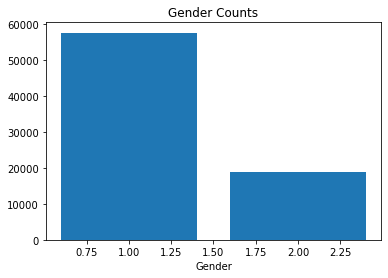

In [25]:
# bar graph of gender female, male ratio numbers
count = df['gender'].value_counts()
count
plt.bar(count.index, count)
plt.xlabel("Gender")
plt.title("Gender Counts")
plt.show()

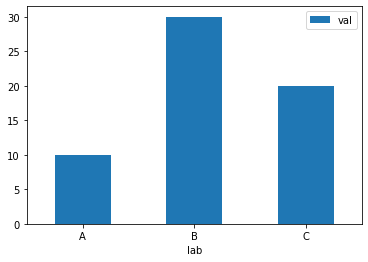

In [30]:
df3 = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [ ]:
# scatter plot of trip durations
plt.scatter(x=df.tripduration, y=restaurants.latitude,alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()